# ASSIGNMENT - 5 (Customer Activation and Retention)

## Punit Vishal Singh----> 12/8/22

In [1]:
import numpy as np
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import re
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
Retention=pd.read_excel(r"C:\Users\punit\OneDrive\Documents\Internship With Flip Robo\1842\5-170822\customer_retention_dataset-work.xlsx")
Retention.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [3]:
Retention.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [4]:
Retention.dtypes

1Gender of respondent                                                   object
2 How old are you?                                                      object
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                              object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

In [5]:
Retention.shape

(269, 71)

In [6]:
Retention.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [7]:
# To know the statistical summaries like mean, SD, min, max, etc

Retention.describe()

,4 What is the Pin Code of where you shop online from?
count,269.000000
mean,220465.747212
std,140524.341051
min,110008.000000
25%,122018.000000
50%,201303.000000
75%,201310.000000
max,560037.000000


In [8]:
Retention.isnull()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
265,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
266,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
267,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
Retention.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

<AxesSubplot:>

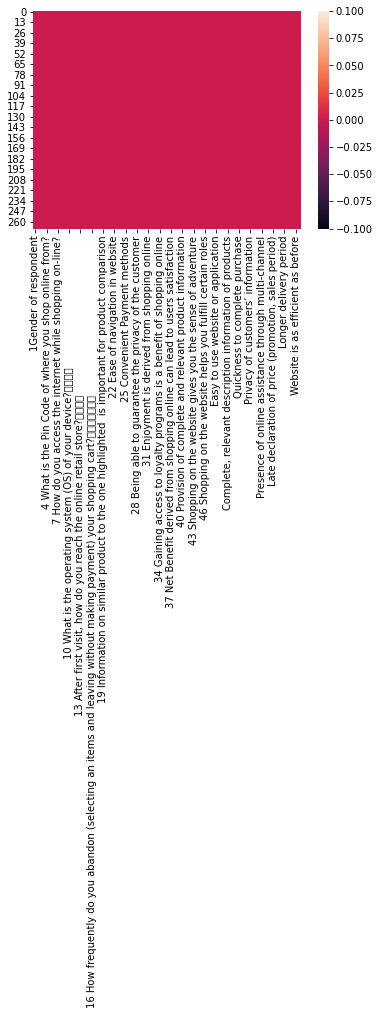

In [10]:
sns.heatmap(Retention.isnull())

<AxesSubplot:>

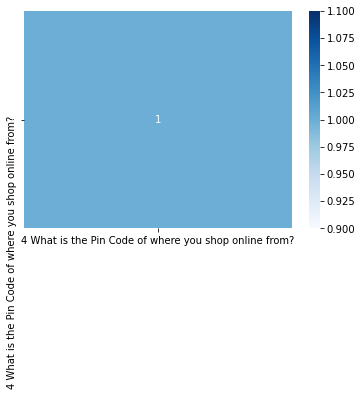

In [11]:
sns.heatmap(Retention.corr(),cmap='Blues',annot=True)

<AxesSubplot:xlabel='3 Which city do you shop online from?', ylabel='count'>

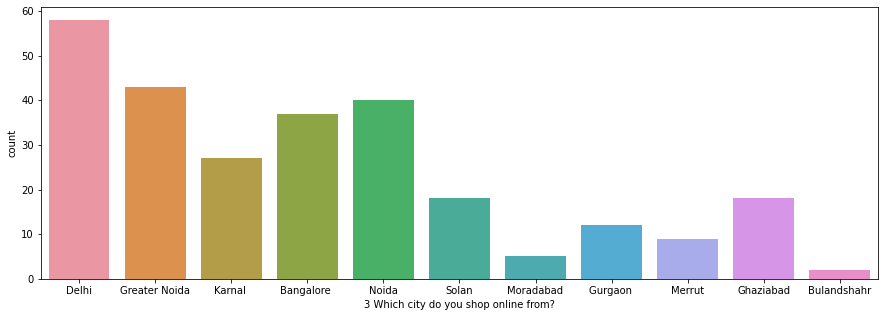

In [12]:
plt.figure(figsize=(15,5))

sns.countplot(Retention['3 Which city do you shop online from?'])

<AxesSubplot:xlabel='3 Which city do you shop online from?', ylabel='count'>

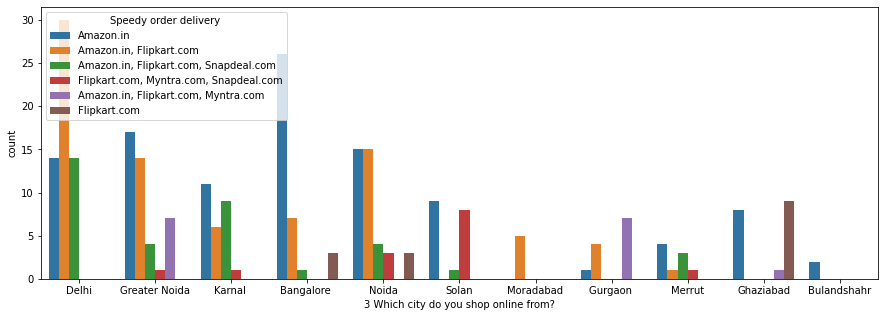

In [13]:
plt.figure(figsize=(15,5))

sns.countplot(x='3 Which city do you shop online from?',hue='Speedy order delivery ', data=Retention)

<AxesSubplot:xlabel='3 Which city do you shop online from?', ylabel='count'>

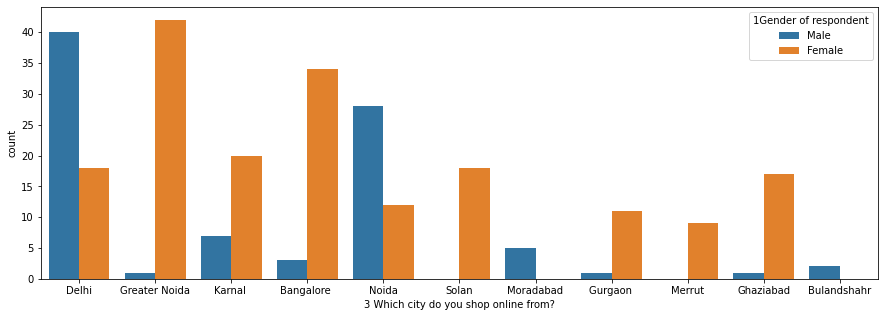

In [14]:
plt.figure(figsize=(15,5))

sns.countplot(x='3 Which city do you shop online from?',hue='1Gender of respondent', data=Retention)

<AxesSubplot:xlabel='3 Which city do you shop online from?', ylabel='count'>

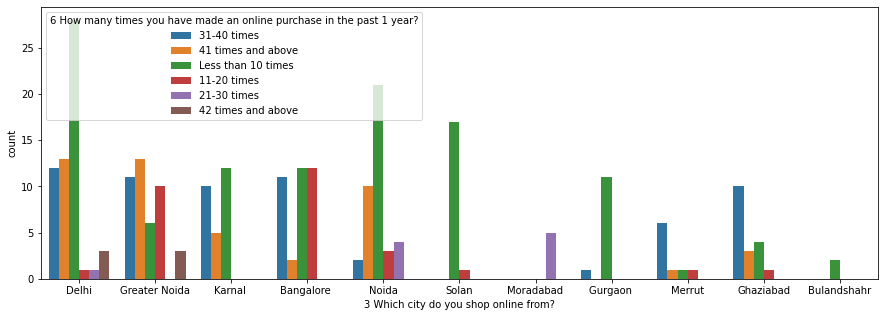

In [15]:
plt.figure(figsize=(15,5))

sns.countplot(x='3 Which city do you shop online from?',hue='6 How many times you have made an online purchase in the past 1 year?', data=Retention)

<AxesSubplot:xlabel='3 Which city do you shop online from?', ylabel='count'>

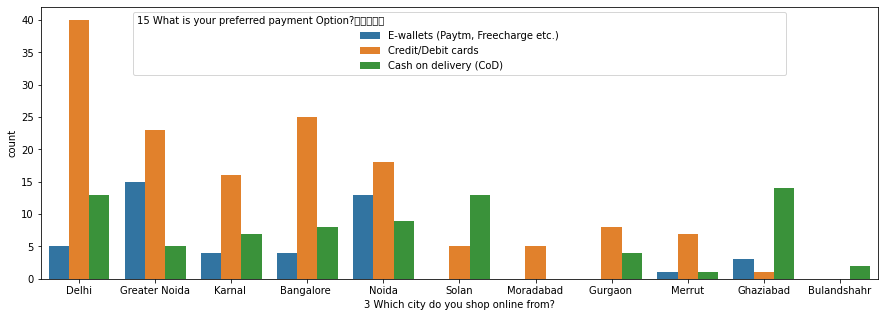

In [16]:
plt.figure(figsize=(15,5))

sns.countplot(x='3 Which city do you shop online from?',hue='15 What is your preferred payment Option?					                                                                                                                               ', data=Retention)

<AxesSubplot:xlabel='3 Which city do you shop online from?', ylabel='count'>

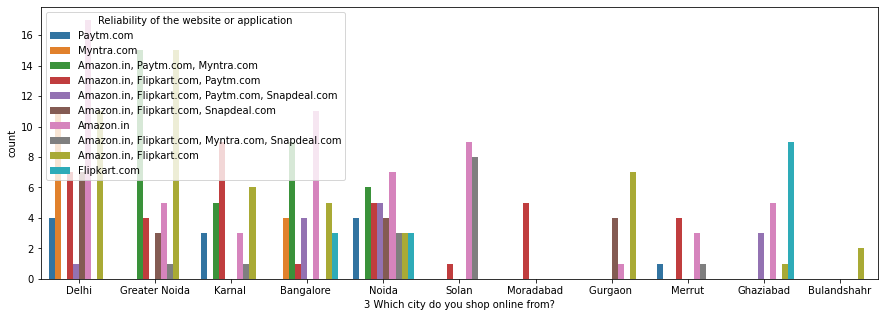

In [17]:
plt.figure(figsize=(15,5))

sns.countplot(x='3 Which city do you shop online from?',hue='Reliability of the website or application', data=Retention)

<AxesSubplot:xlabel='3 Which city do you shop online from?', ylabel='count'>

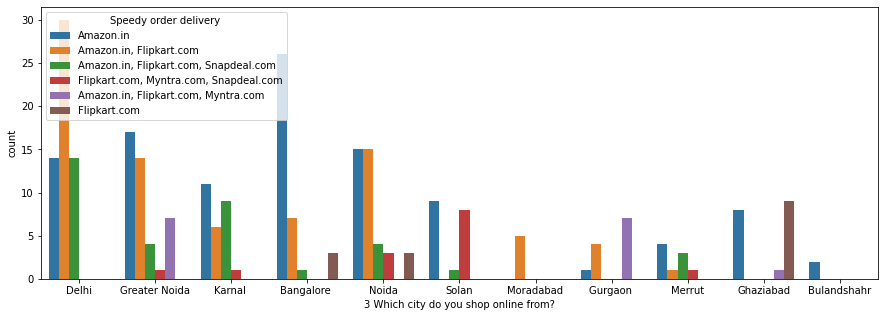

In [18]:
plt.figure(figsize=(15,5))

sns.countplot(x='3 Which city do you shop online from?',hue='Speedy order delivery ', data=Retention)

<AxesSubplot:xlabel='3 Which city do you shop online from?', ylabel='count'>

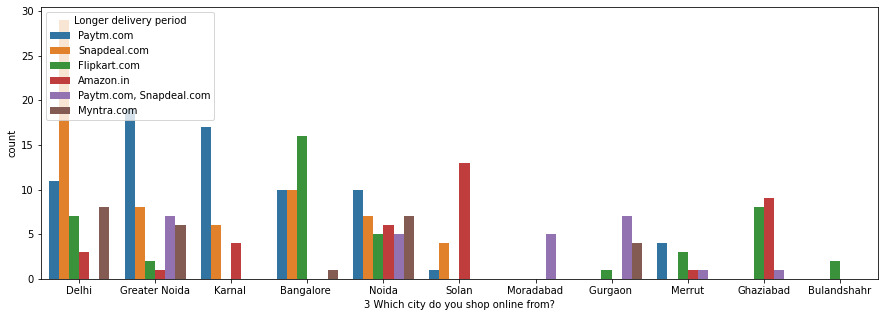

In [19]:
plt.figure(figsize=(15,5))

sns.countplot(x='3 Which city do you shop online from?',hue='Longer delivery period', data=Retention)

<AxesSubplot:xlabel='3 Which city do you shop online from?', ylabel='count'>

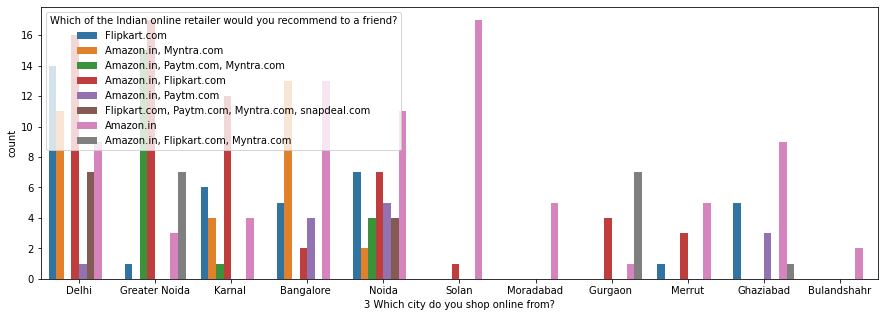

In [20]:
plt.figure(figsize=(15,5))

sns.countplot(x='3 Which city do you shop online from?',hue='Which of the Indian online retailer would you recommend to a friend?', data=Retention)

<AxesSubplot:xlabel='1Gender of respondent', ylabel='count'>

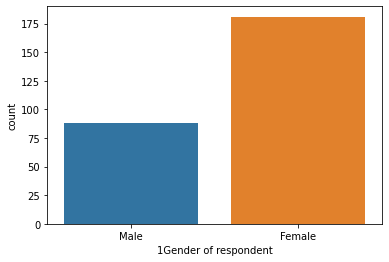

In [21]:
sns.countplot(x='1Gender of respondent', data=Retention)

<AxesSubplot:xlabel='1Gender of respondent', ylabel='count'>

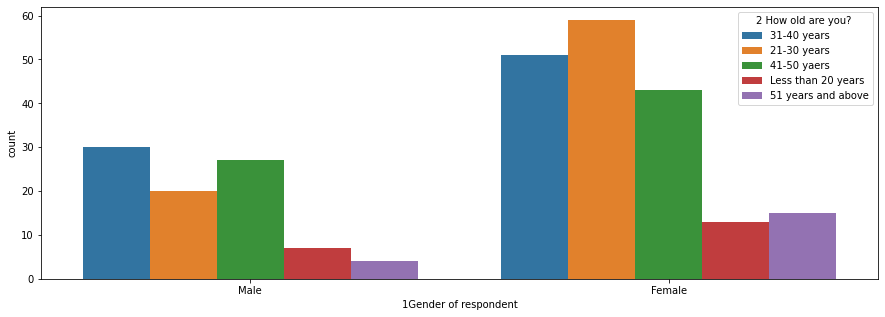

In [22]:
plt.figure(figsize=(15,5))

sns.countplot(x='1Gender of respondent',hue='2 How old are you? ', data=Retention)

<AxesSubplot:xlabel='2 How old are you? ', ylabel='count'>

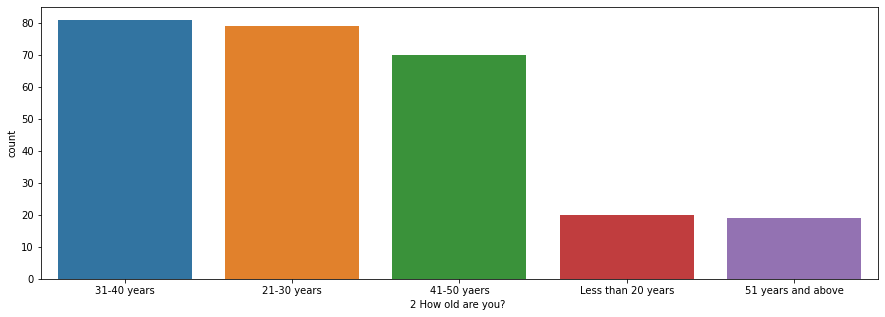

In [23]:
plt.figure(figsize=(15,5))

sns.countplot(x='2 How old are you? ', data=Retention)

<AxesSubplot:xlabel='3 Which city do you shop online from?', ylabel='count'>

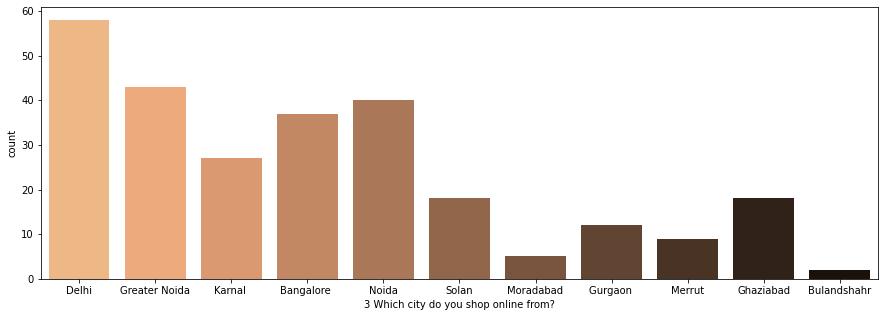

In [24]:
plt.figure(figsize=(15,5))

sns.countplot(x='3 Which city do you shop online from?', data=Retention,palette='copper_r')

<AxesSubplot:xlabel='count', ylabel='4 What is the Pin Code of where you shop online from?'>

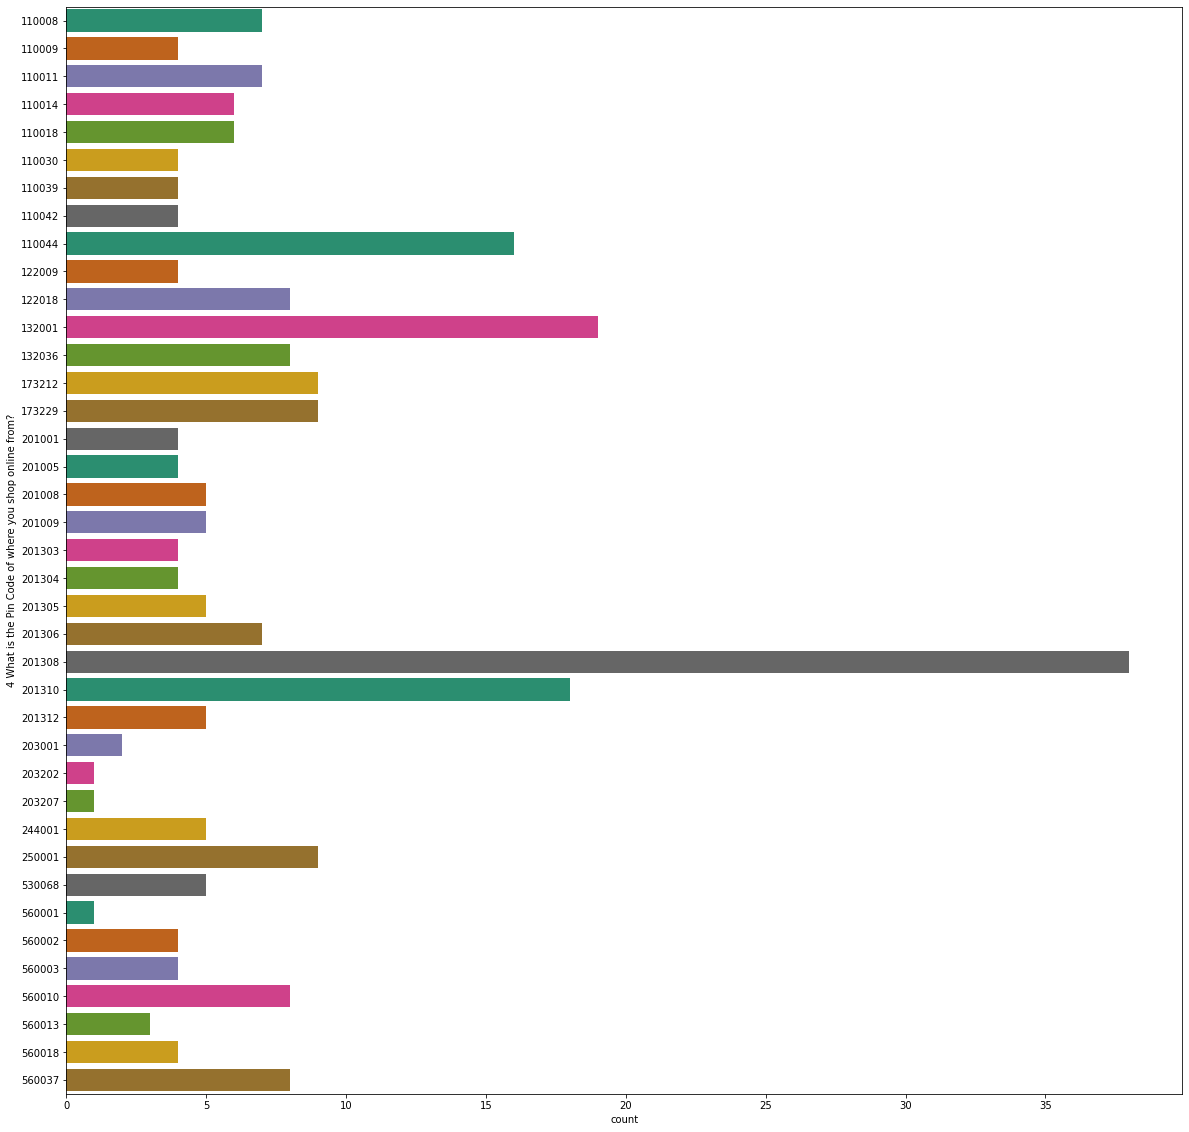

In [25]:
plt.figure(figsize=(20,20))

sns.countplot(y='4 What is the Pin Code of where you shop online from?', data=Retention,palette='Dark2')

<AxesSubplot:xlabel='5 Since How Long You are Shopping Online ?', ylabel='count'>

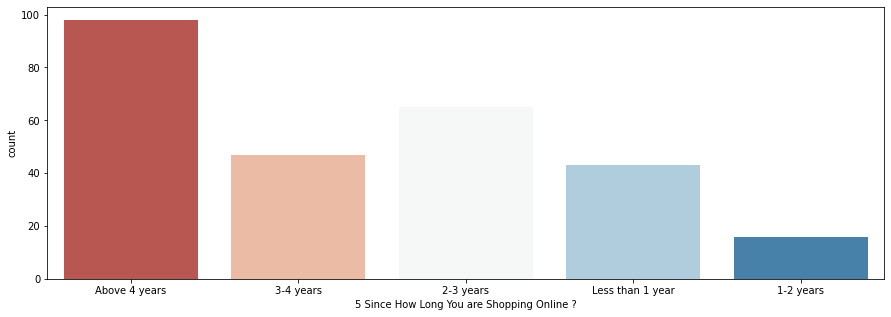

In [26]:
plt.figure(figsize=(15,5))

sns.countplot(x='5 Since How Long You are Shopping Online ?', data=Retention,palette='RdBu')

<AxesSubplot:xlabel='From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ', ylabel='count'>

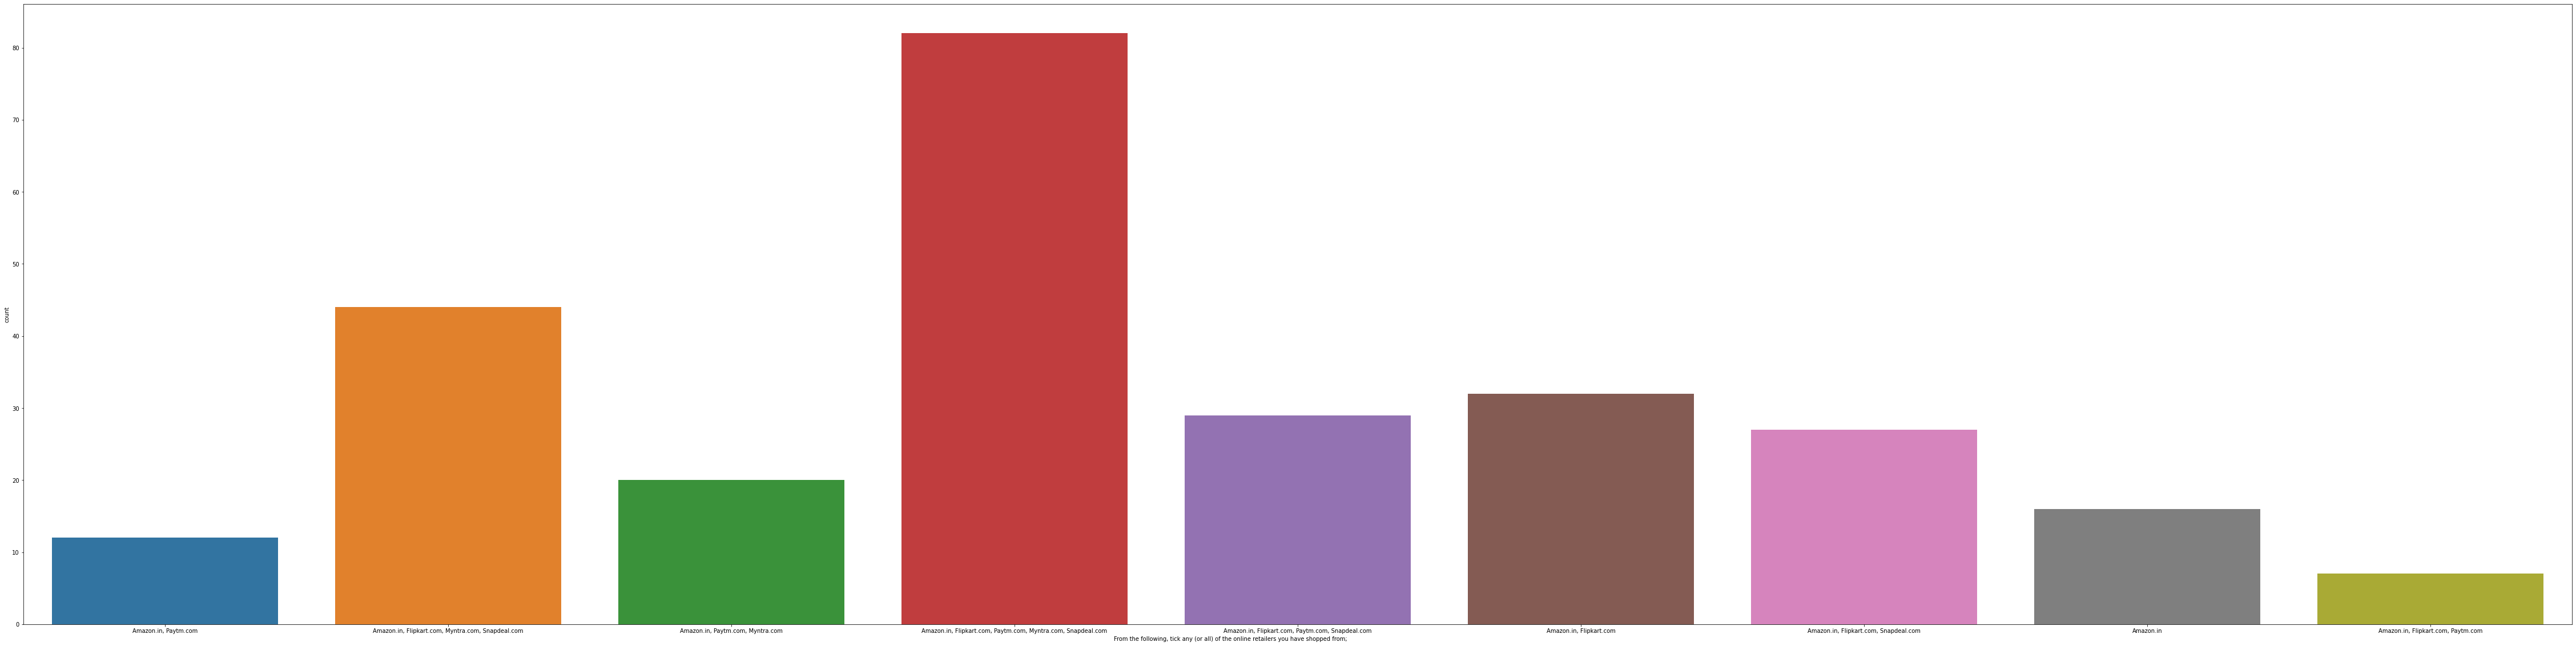

In [27]:
plt.figure(figsize=(80,20))

sns.countplot(x='From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ', data=Retention)

<AxesSubplot:xlabel='Speedy order delivery ', ylabel='count'>

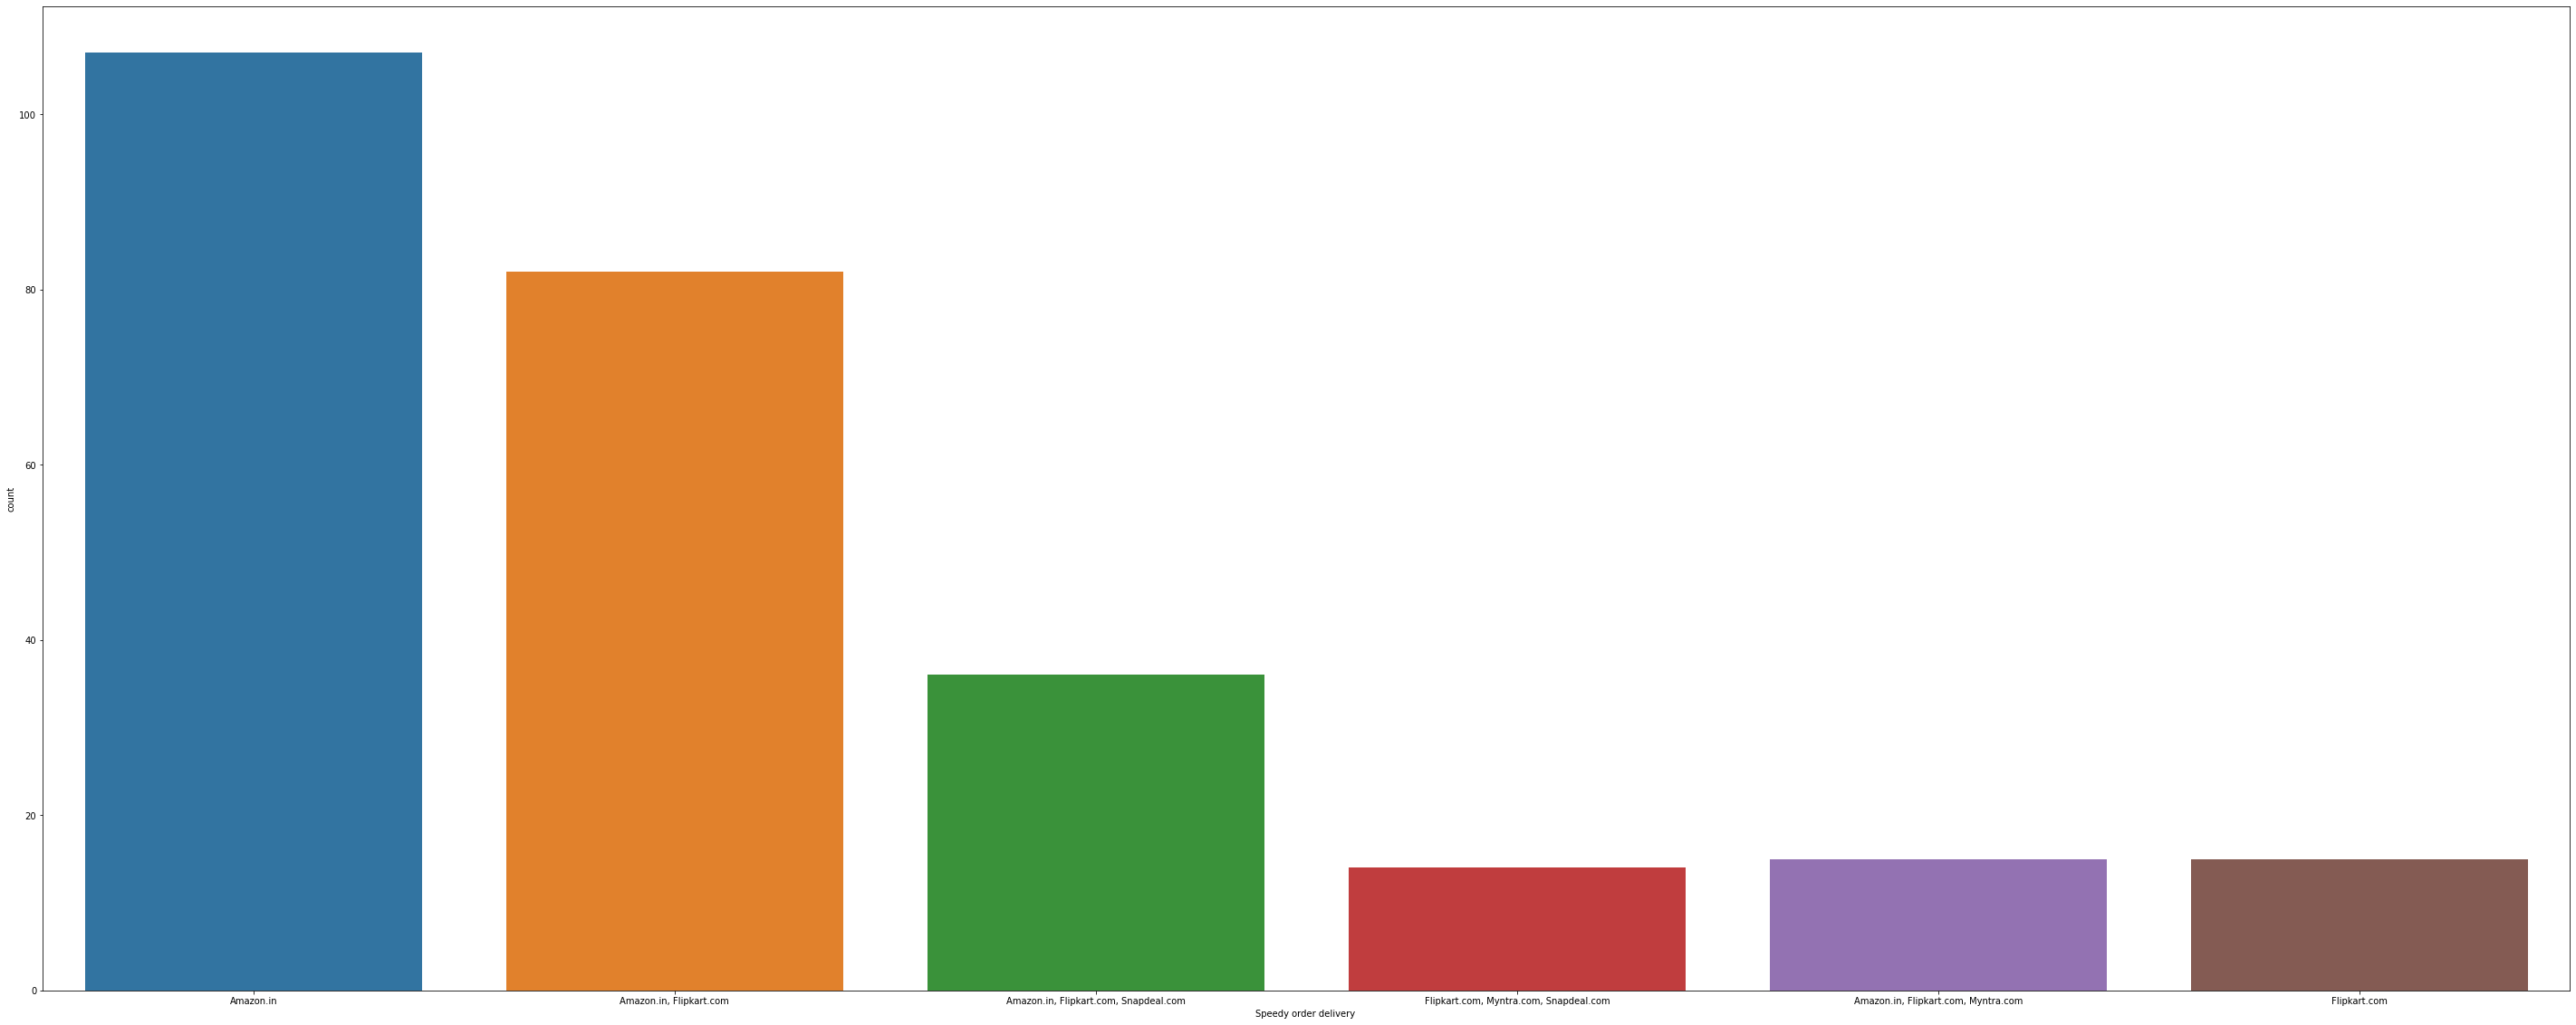

In [28]:
plt.figure(figsize=(50,20))

sns.countplot(x='Speedy order delivery ', data=Retention)

<AxesSubplot:xlabel='Privacy of customers’ information', ylabel='count'>

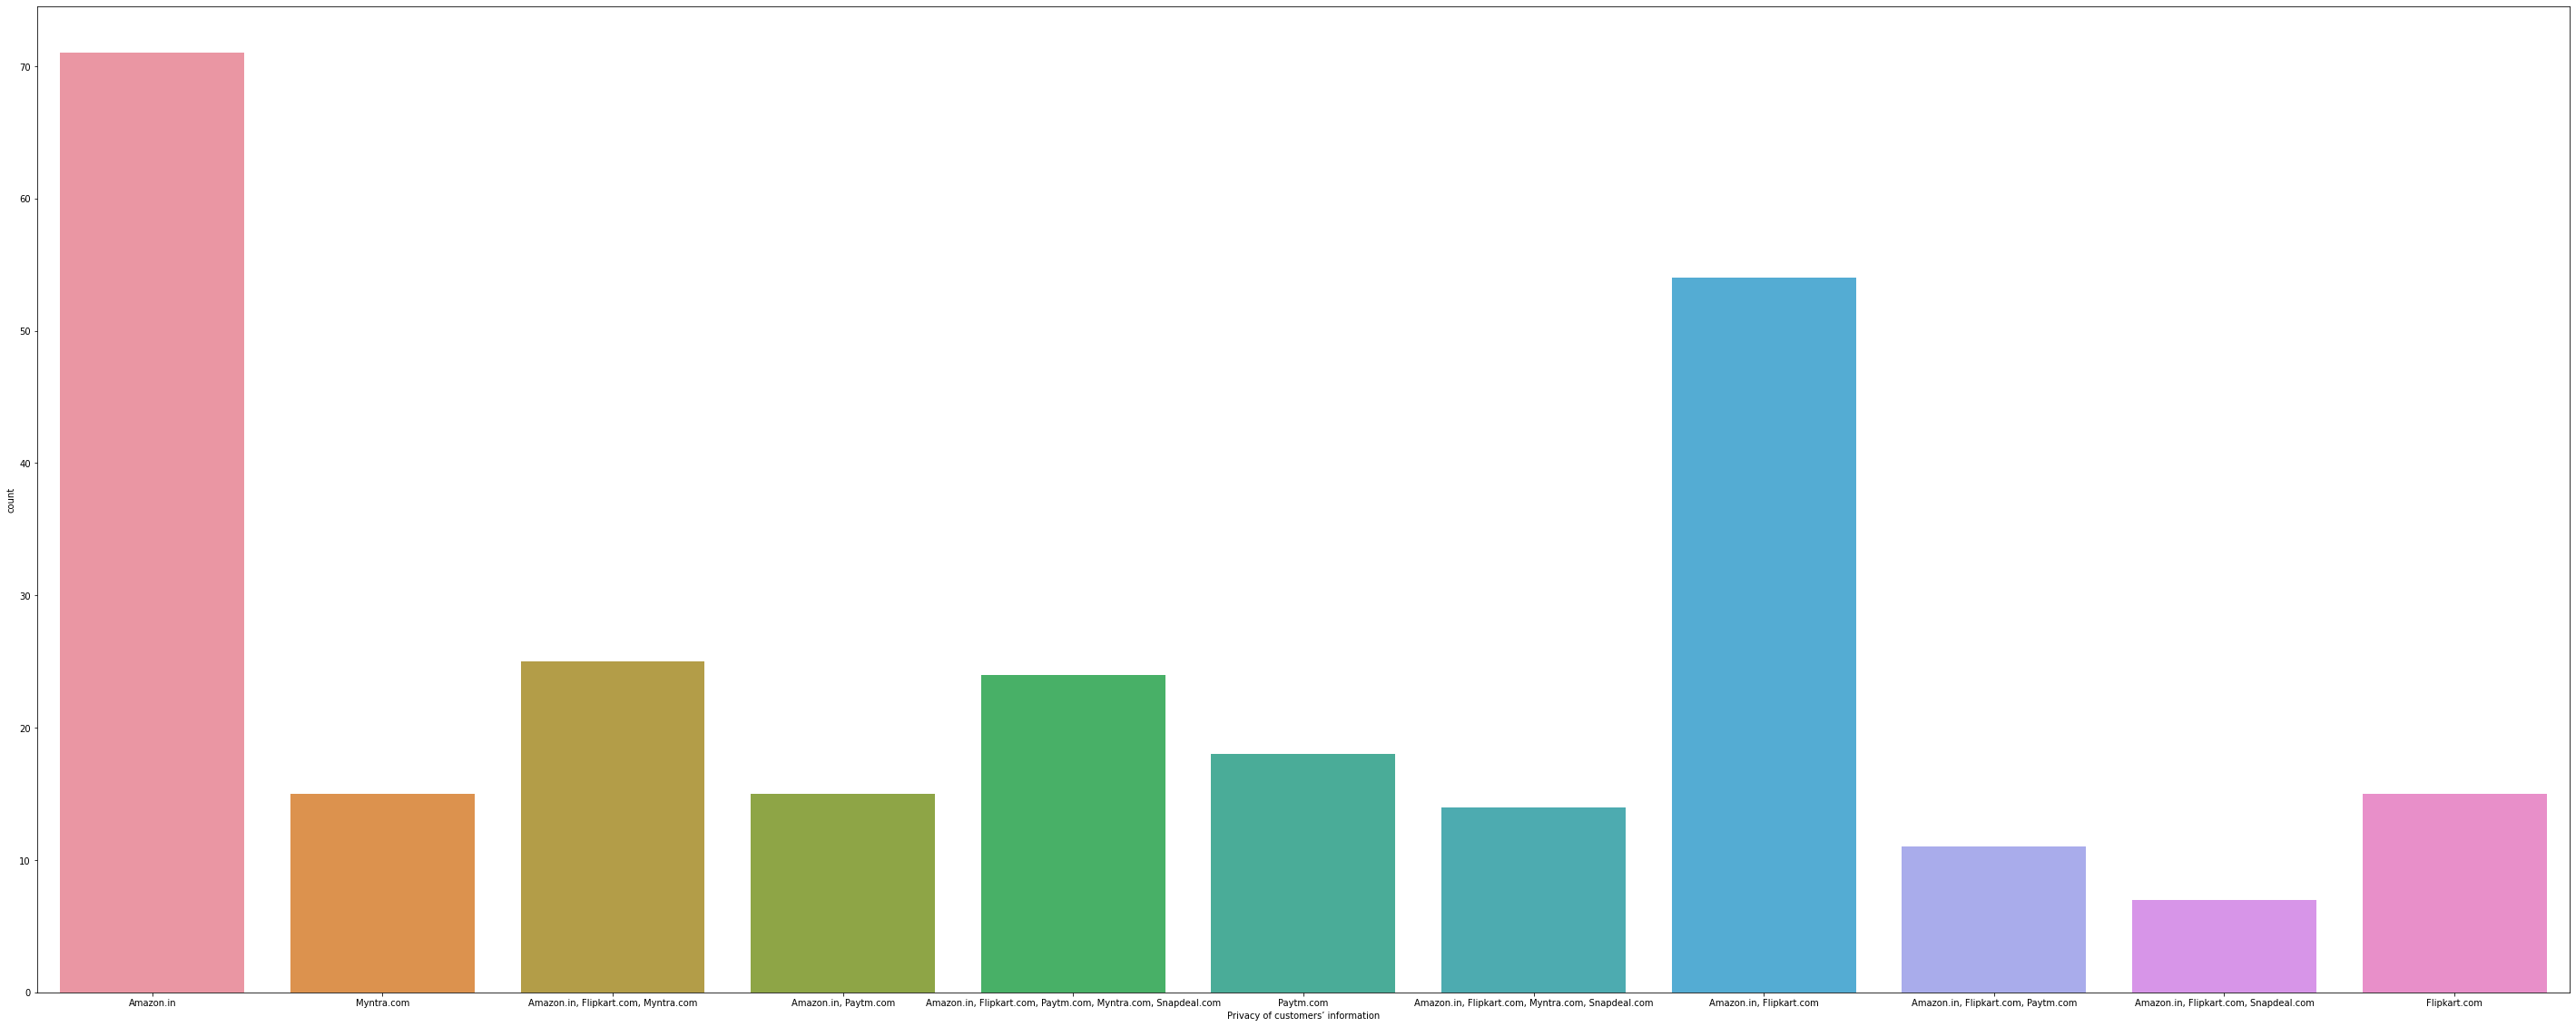

In [29]:
plt.figure(figsize=(50,20))

sns.countplot(x='Privacy of customers’ information', data=Retention)

<AxesSubplot:xlabel='count', ylabel='Longer delivery period'>

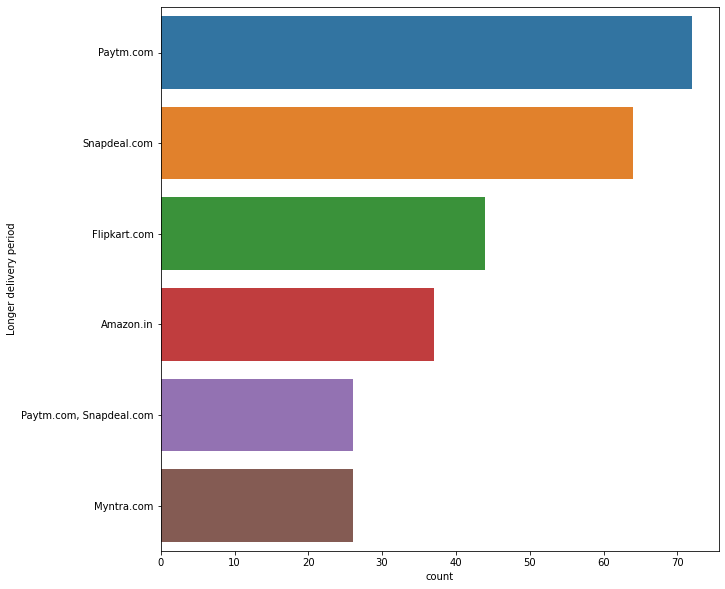

In [30]:
plt.figure(figsize=(10,10))

sns.countplot(y='Longer delivery period', data=Retention)

<AxesSubplot:xlabel='count', ylabel='Which of the Indian online retailer would you recommend to a friend?'>

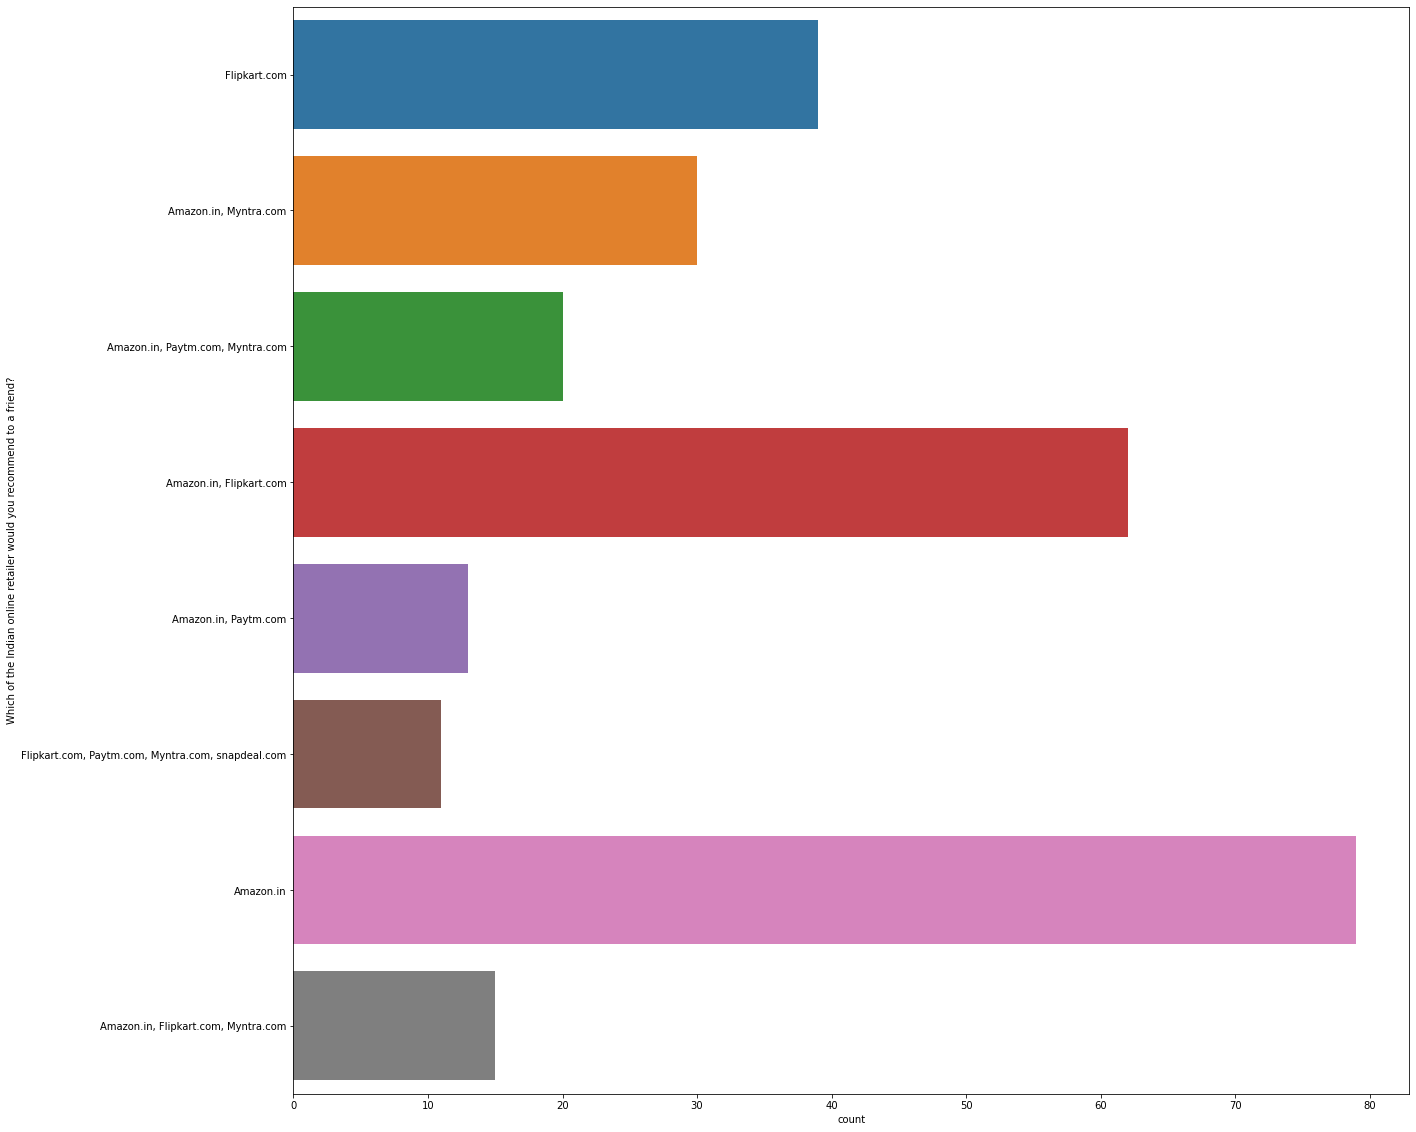

In [31]:
plt.figure(figsize=(20,20))

sns.countplot(y='Which of the Indian online retailer would you recommend to a friend?', data=Retention)

<AxesSubplot:xlabel='4 What is the Pin Code of where you shop online from?', ylabel='Density'>

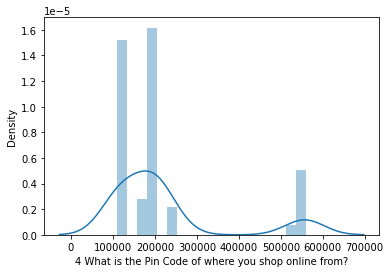

In [32]:
sns.distplot(Retention['4 What is the Pin Code of where you shop online from?'])

<AxesSubplot:xlabel='4 What is the Pin Code of where you shop online from?', ylabel='Count'>

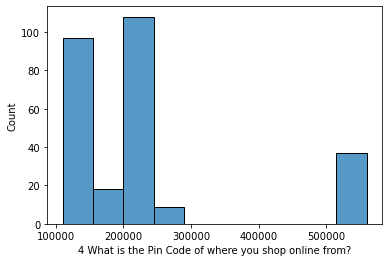

In [33]:
sns.histplot(Retention['4 What is the Pin Code of where you shop online from?'],bins=10)

<AxesSubplot:xlabel='5 Since How Long You are Shopping Online ?', ylabel='Count'>

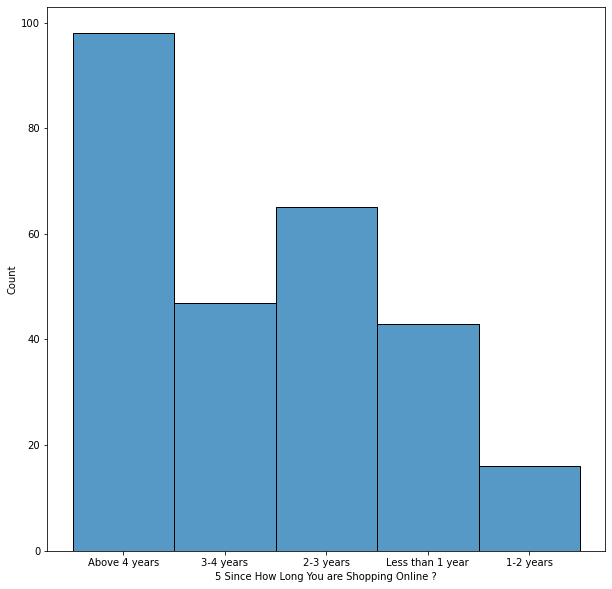

In [34]:
plt.figure(figsize=(10,10))

sns.histplot(Retention['5 Since How Long You are Shopping Online ?'],bins=20)

<AxesSubplot:xlabel='6 How many times you have made an online purchase in the past 1 year?', ylabel='Count'>

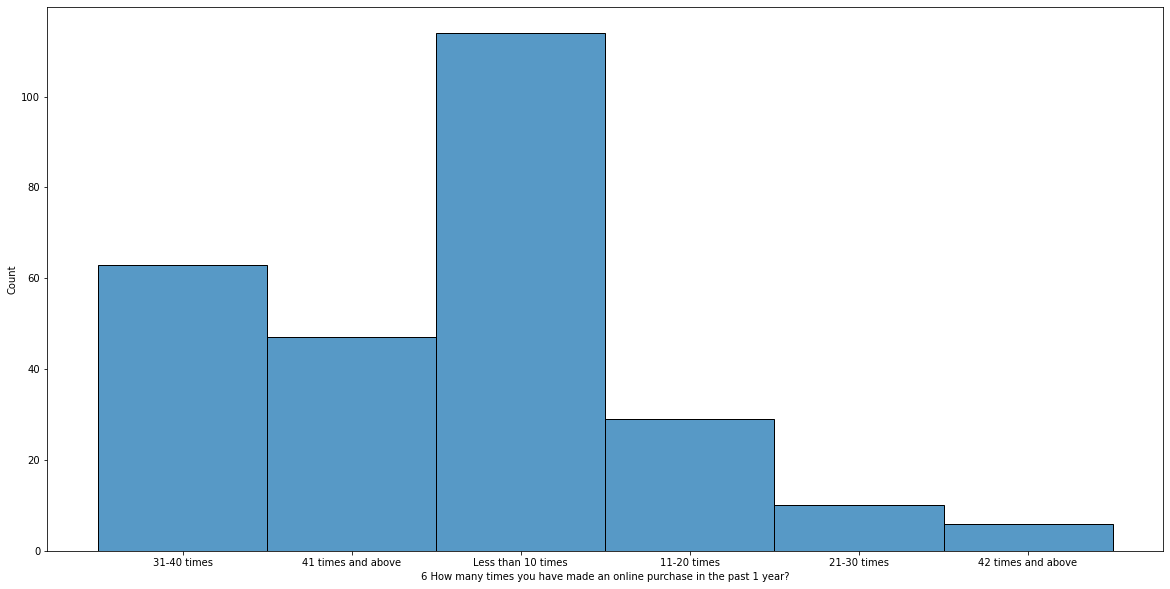

In [35]:
plt.figure(figsize=(20,10))

sns.histplot(Retention['6 How many times you have made an online purchase in the past 1 year?'],bins=10)

<AxesSubplot:xlabel='9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ', ylabel='Count'>

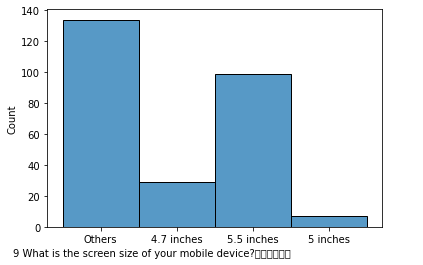

In [36]:
sns.histplot(Retention['9 What is the screen size of your mobile device?						                                        '],bins=20)

<AxesSubplot:xlabel='11 What browser do you run on your device to access the website?\t\t\t                                                          ', ylabel='Count'>

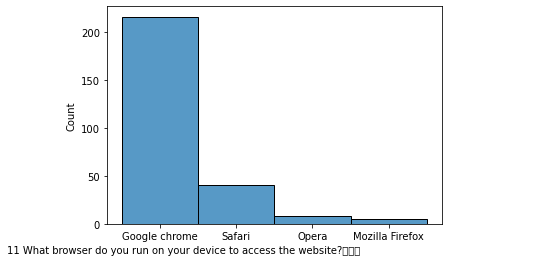

In [37]:
sns.histplot(Retention['11 What browser do you run on your device to access the website?			                                                          '],bins=20)

<AxesSubplot:xlabel='13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ', ylabel='Count'>

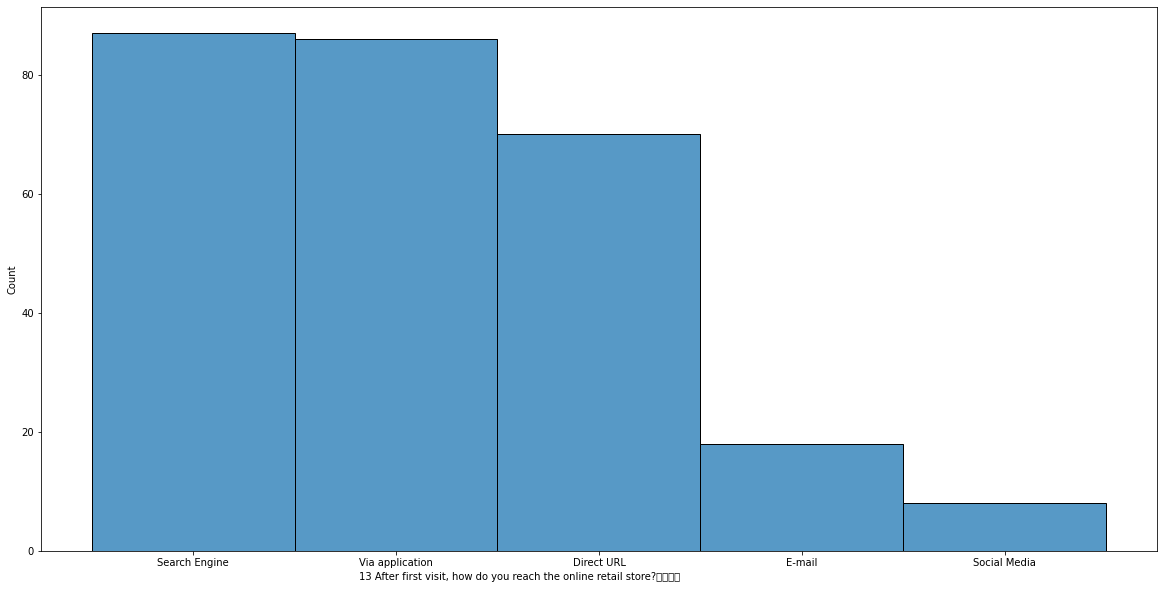

In [38]:
plt.figure(figsize=(20,10))

sns.histplot(Retention['13 After first visit, how do you reach the online retail store?				                                                   '],bins=10)

<AxesSubplot:xlabel='15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ', ylabel='Count'>

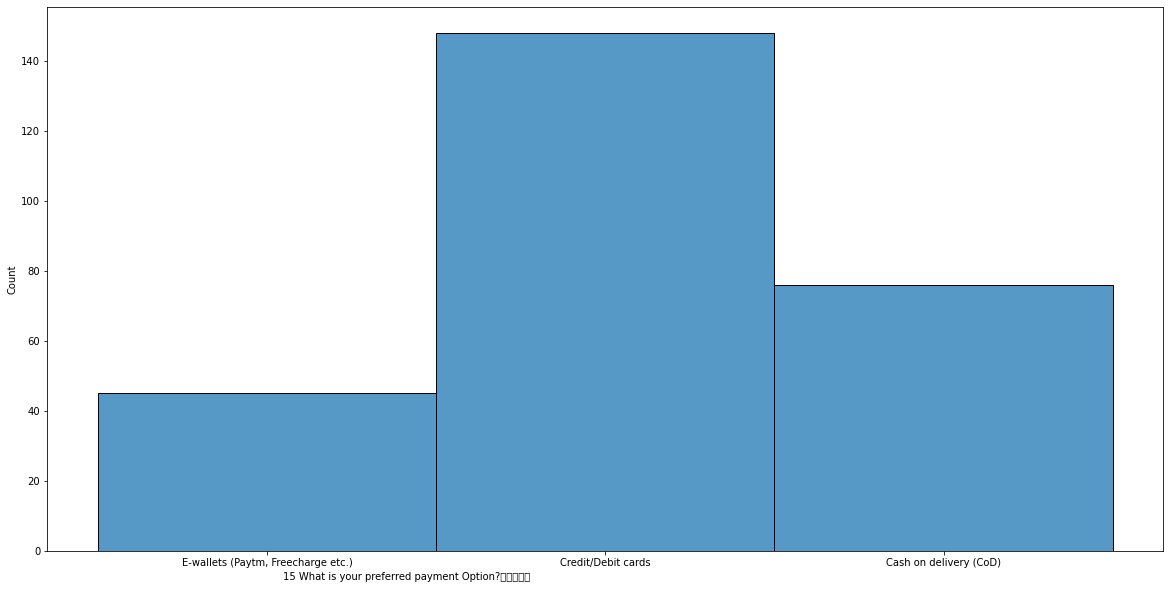

In [39]:
plt.figure(figsize=(20,10))

sns.histplot(Retention['15 What is your preferred payment Option?					                                                                                                                               '],bins=20)

<AxesSubplot:xlabel='22 Ease of navigation in website', ylabel='Count'>

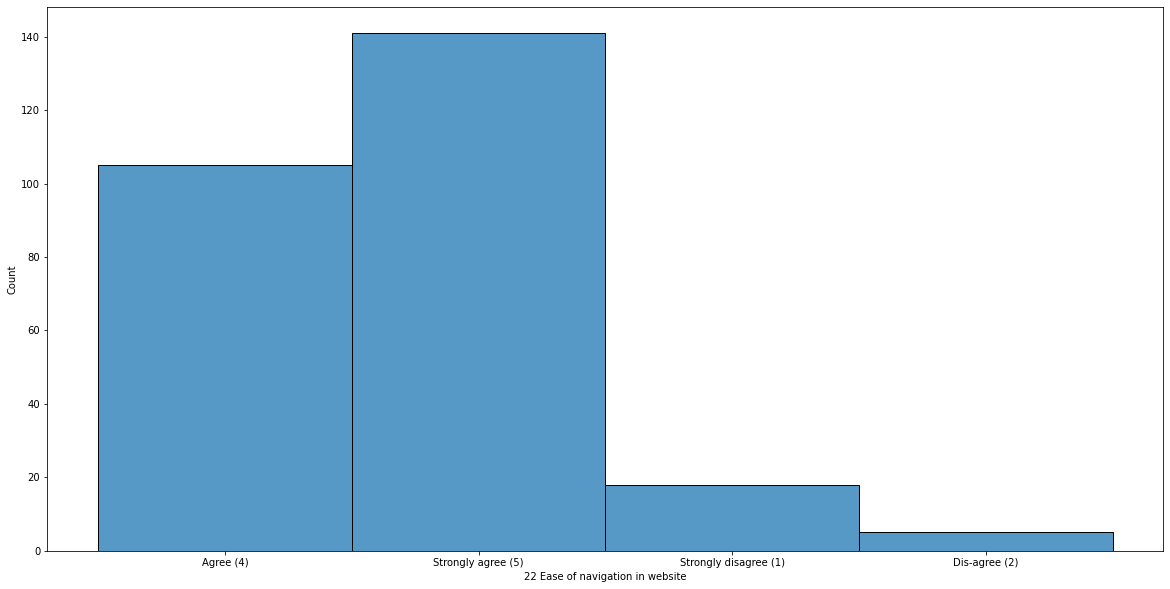

In [40]:
plt.figure(figsize=(20,10))

sns.histplot(Retention['22 Ease of navigation in website'],bins=10)

<AxesSubplot:xlabel='30 Online shopping gives monetary benefit and discounts', ylabel='Count'>

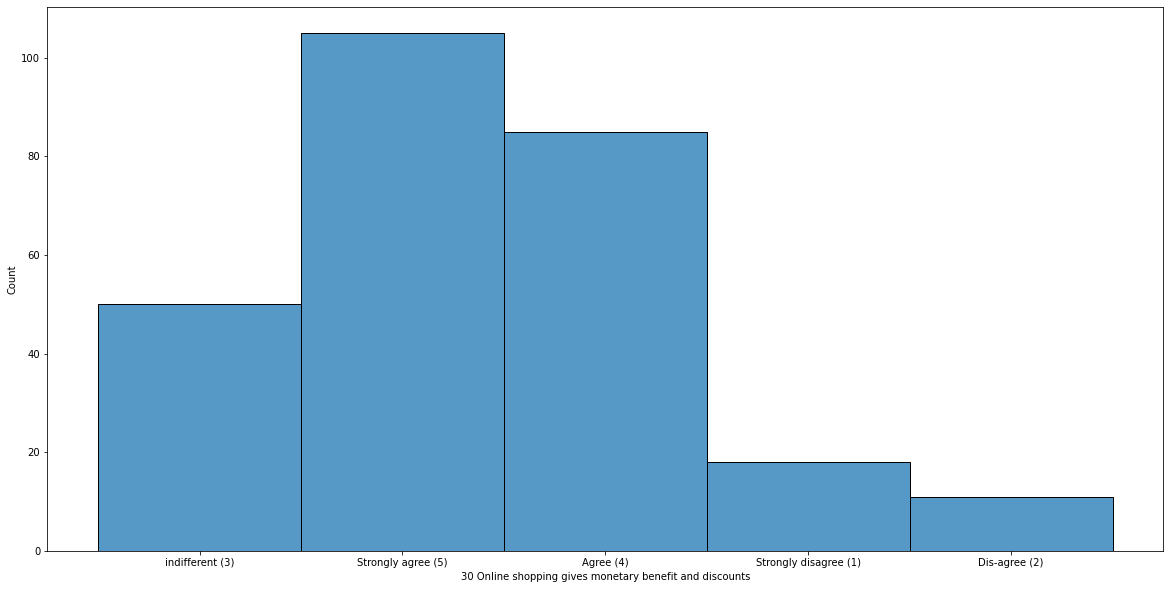

In [41]:
plt.figure(figsize=(20,10))

sns.histplot(Retention['30 Online shopping gives monetary benefit and discounts'],bins=50)

<AxesSubplot:xlabel='33 Return and replacement policy of the e-tailer is important for purchase decision', ylabel='Count'>

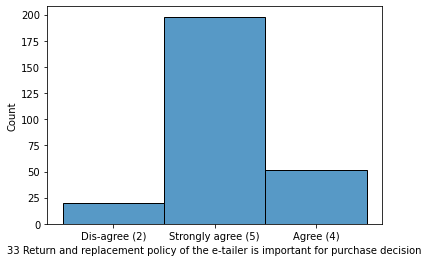

In [42]:
sns.histplot(Retention['33 Return and replacement policy of the e-tailer is important for purchase decision'],bins=10)

<AxesSubplot:xlabel='39 Offering a wide variety of listed product in several category', ylabel='Count'>

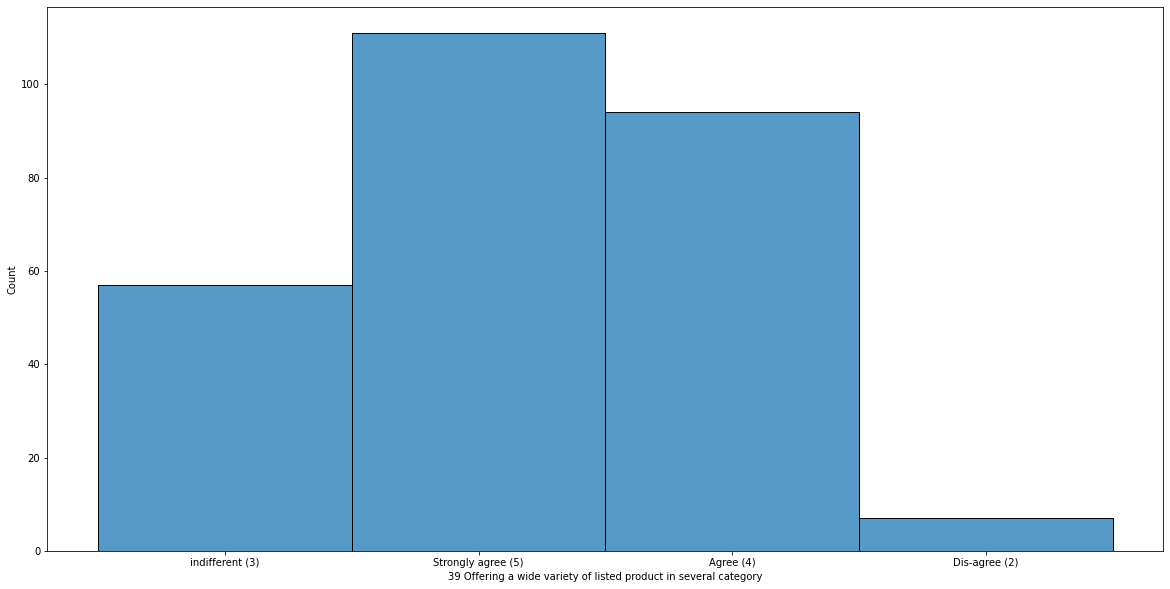

In [43]:
plt.figure(figsize=(20,10))

sns.histplot(Retention['39 Offering a wide variety of listed product in several category'],bins=100)

<AxesSubplot:xlabel='47 Getting value for money spent', ylabel='Count'>

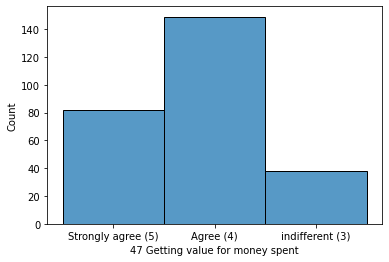

In [44]:
sns.histplot(Retention['47 Getting value for money spent'],bins=10)

<AxesSubplot:xlabel='Easy to use website or application', ylabel='Count'>

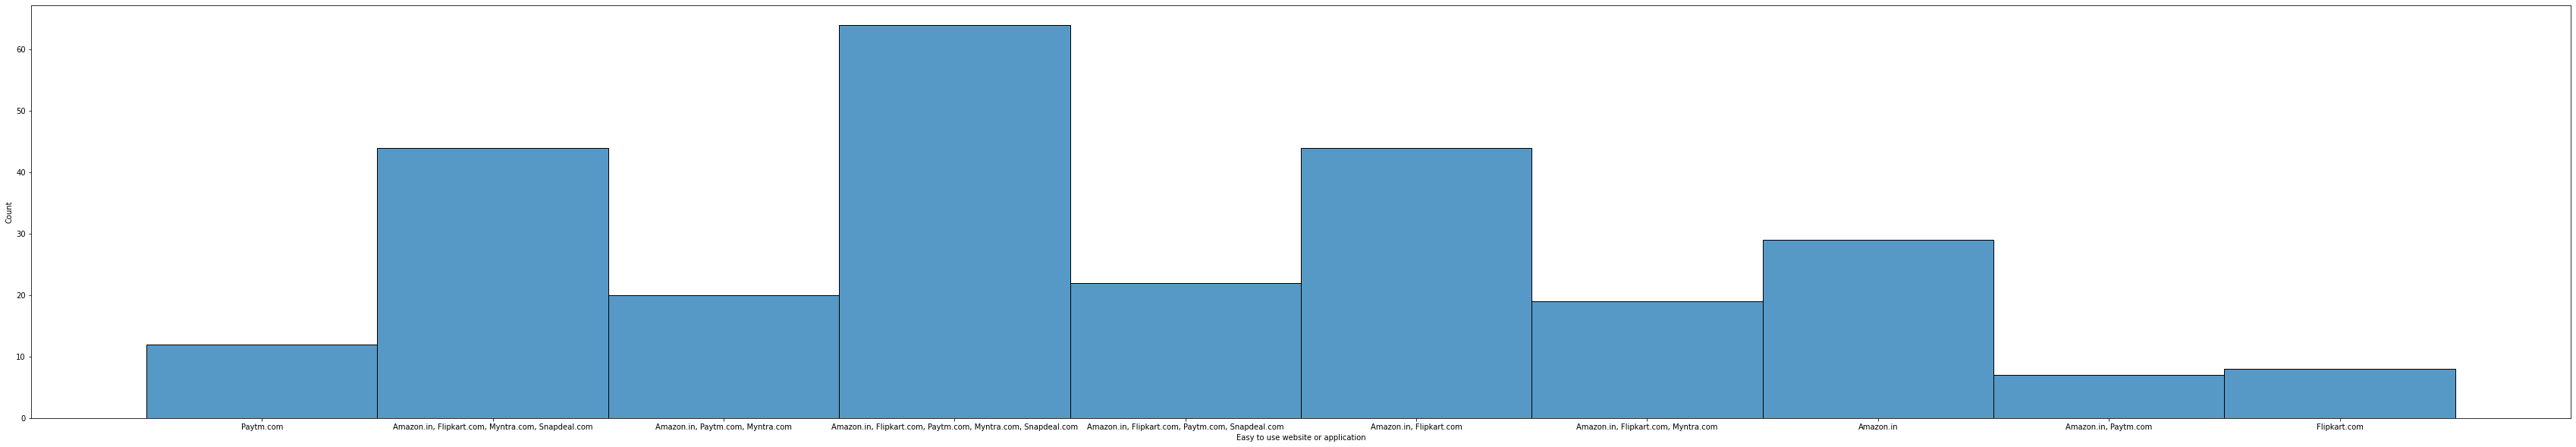

In [45]:
plt.figure(figsize=(60,10))

sns.histplot(Retention['Easy to use website or application'],bins=50)

<AxesSubplot:xlabel='Longer time in displaying graphics and photos (promotion, sales period)', ylabel='Count'>

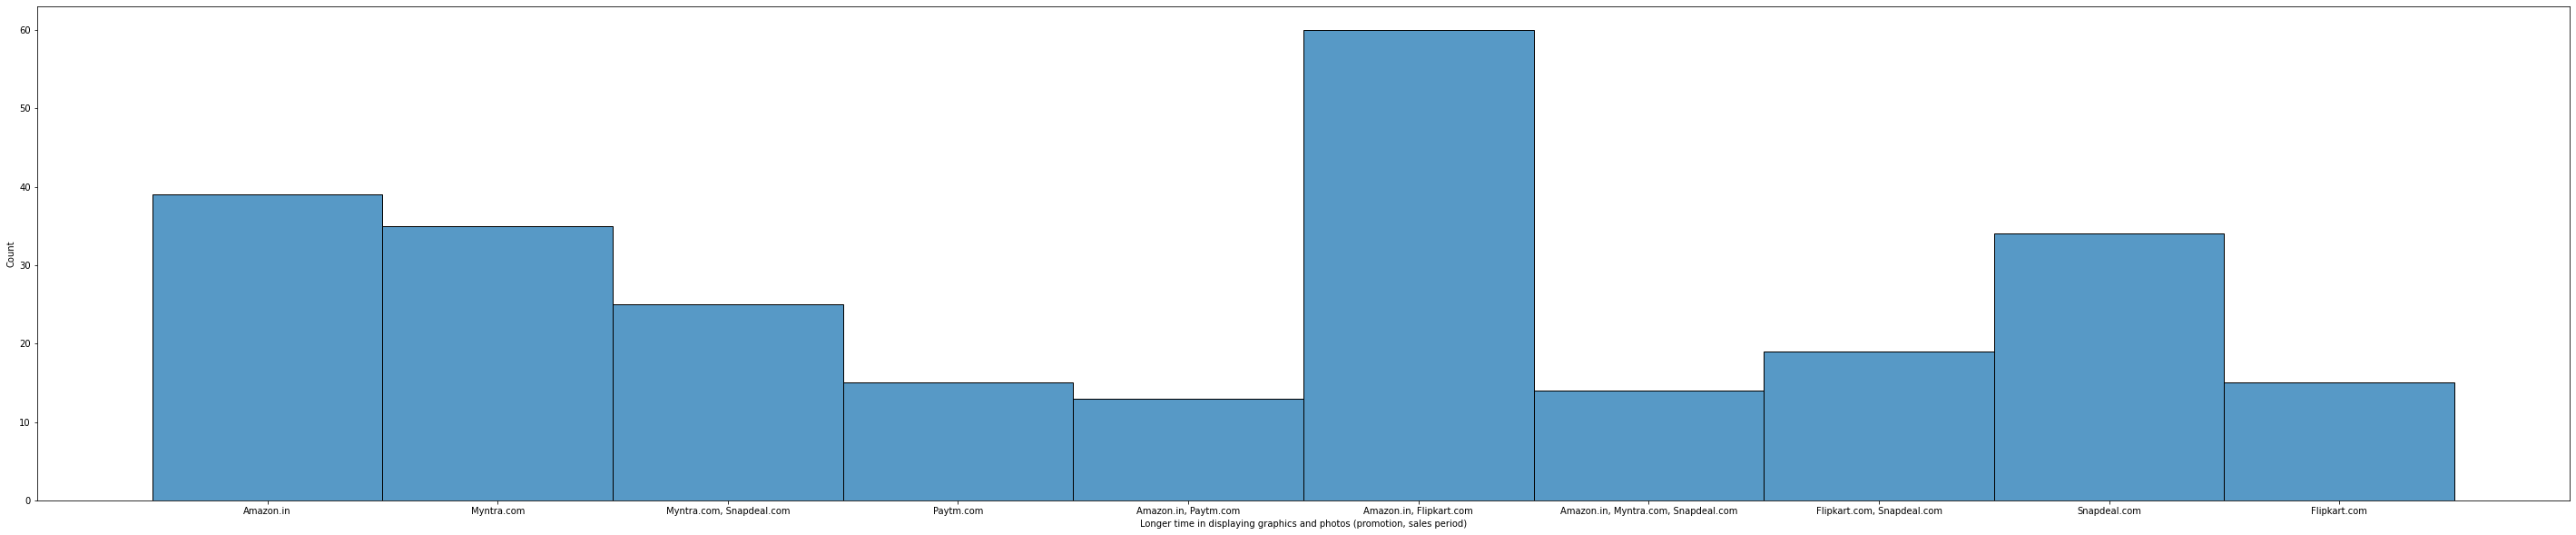

In [46]:
plt.figure(figsize=(50,10))

sns.histplot(Retention['Longer time in displaying graphics and photos (promotion, sales period)'],bins=50)

<AxesSubplot:xlabel='Longer delivery period', ylabel='Count'>

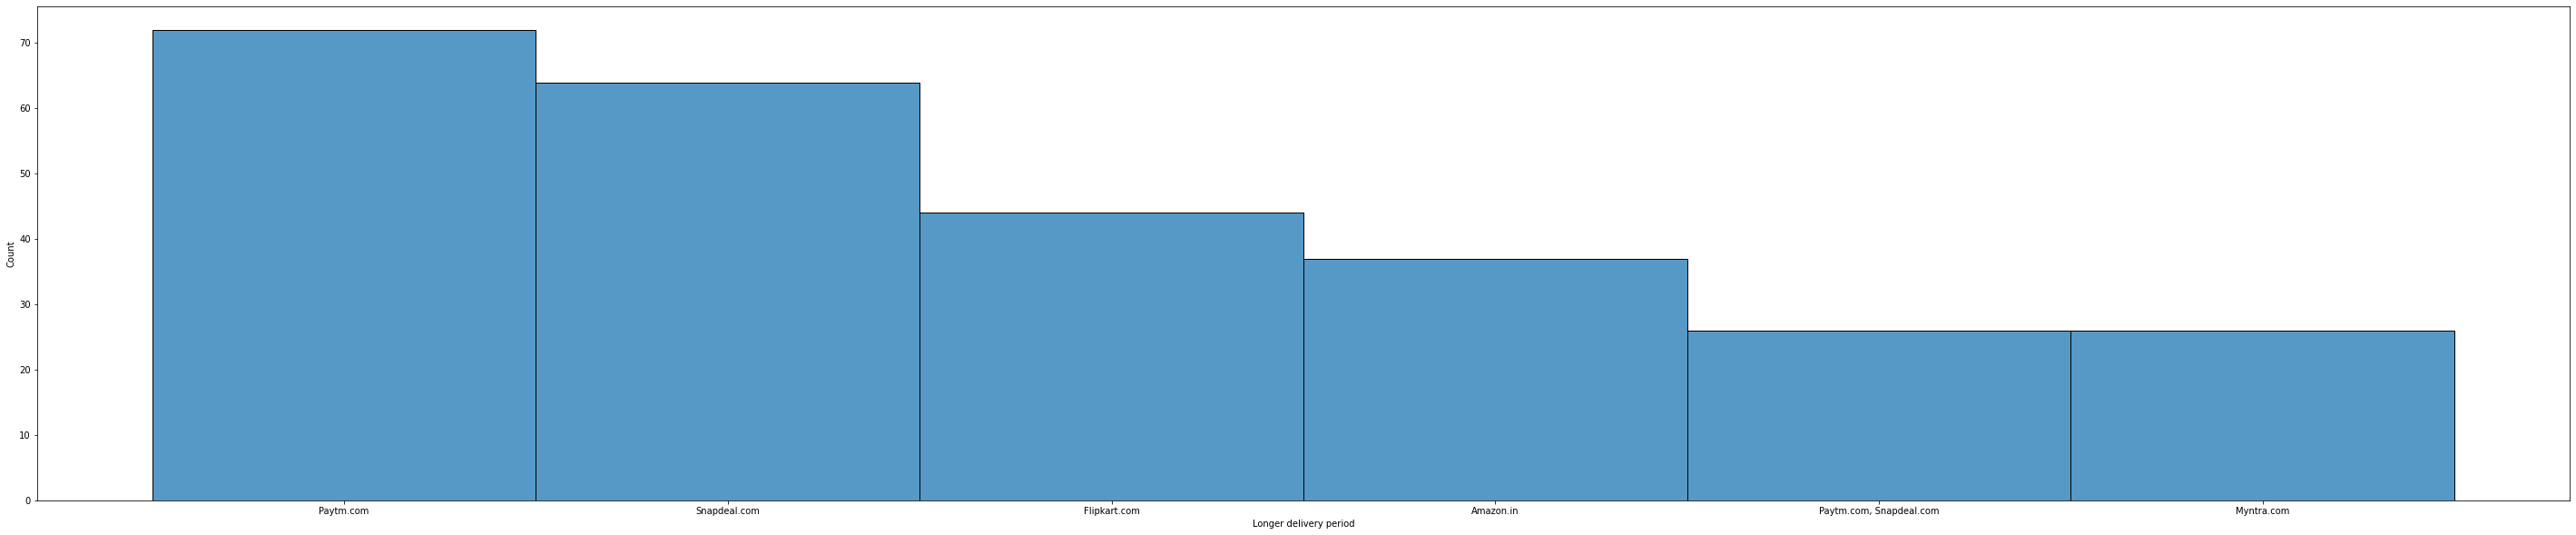

In [47]:
plt.figure(figsize=(50,10))

sns.histplot(Retention['Longer delivery period'],bins=10)

## To Check Distribution of Skewness

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

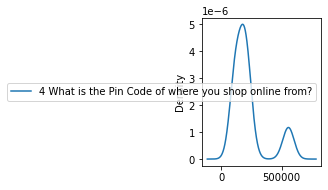

In [50]:
#To check skewness of entire dataset all together 

Retention.plot(kind='kde',subplots=True,layout=(2,6), figsize=(15,6))

<AxesSubplot:xlabel='4 What is the Pin Code of where you shop online from?', ylabel='Density'>

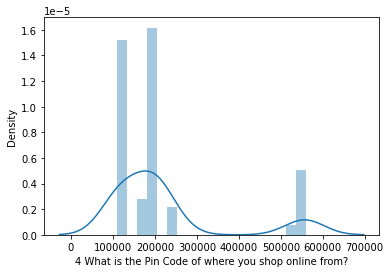

In [51]:
sns.distplot(Retention['4 What is the Pin Code of where you shop online from?'])